## Assignment 3: $k$ Nearest Neighbor

**Do two questions.**

`! git clone https://github.com/DS3001/knn`

In [1]:
! git clone https://github.com/DS3001/knn

Cloning into 'knn'...
remote: Enumerating objects: 68, done.
remote: Counting objects: 100% (29/29), done.
remote: Compressing objects: 100% (21/21), done.
remote: Total 68 (delta 20), reused 8 (delta 8), pack-reused 39 (from 1)
Receiving objects: 100% (68/68), 13.54 MiB | 10.47 MiB/s, done.
Resolving deltas: 100% (25/25), done.


**Q0.**
1. What is the difference between regression and classification?
Regression is when we predict a numeric while classification is when we assign data points to a category.
2. What is a confusion table? What does it help us understand about a model's performance? A confusion table is used to evaluate the performance of a classification model by cross-tabulating actual and predicted values. This can be used to understand a model's performance by seeing when the model correctly classifies data points and when it inaccurately classifies data points.
3. What does the SSE quantify about a particular model?
SSE quantifies the total deviation of predicted values from actual values as the sum of squared differences between actual and predicted values. This indicates how close the model's predictions are to actual values.
4. What are overfitting and underfitting? Overfitting is when the model is too complex, and it fits irrelevant elements of the training data and noise which results in poor predictions on new data. Underfitting is when the model is too simple and does not capture important features of the data which also results in poor predictions.
5. Why does splitting the data into training and testing sets, and choosing $k$ by evaluating accuracy or SSE on the test set, improve model performance?
Splitting into training and testing data allows us to evaluate how well the model performs with new data since the model is trained on the training set and then evaluated on the test set. This allows us to select the value of k that results in the greatest accuracy when making predictions so that we can expect the model to perform well when actually presented with new data in the real world.
6. With classification, we can report a class label as a prediction or a probability distribution over class labels. Please explain the strengths and weaknesses of each approach.
Using class labels provides a clear and easy to understand prediction, but it can lose information about the confidence of the prediction. Using a probability distribution provides more nuanced information about the confidence level of each class, but this can be more challenging to interpret.

**Q1.** This question is a case study for $k$ nearest neighbor regression, using the `USA_cars_datasets.csv` data.

The target variable `y` is `price` and the features are `year` and `mileage`.

1. Load the `./data/USA_cars_datasets.csv`. Keep the following variables and drop the rest: `price`, `year`, `mileage`. Are there any `NA`'s to handle? Look at the head and dimensions of the data.
2. Maxmin normalize `year` and `mileage`.
3. Split the sample into ~80% for training and ~20% for evaluation.
4. Use the $k$NN algorithm and the training data to predict `price` using `year` and `mileage` for the test set for $k=3,10,25,50,100,300$. For each value of $k$, compute the mean squared error and print a scatterplot showing the test value plotted against the predicted value. What patterns do you notice as you increase $k$?
5. Determine the optimal $k$ for these data.
6. Describe what happened in the plots of predicted versus actual prices as $k$ varied, taking your answer into part 6 into account. (Hint: Use the words "underfitting" and "overfitting".)

In [3]:
import numpy as np
import pandas as pd

In [9]:
# 1.1
df = pd.read_csv('knn/data/USA_cars_datasets.csv')
df = df.loc[:, ['price', 'year', 'mileage']]
print(df.shape)
print(df.describe)
df.head()

total_nans = df.isna().sum()
print("Total NaNs:", total_nans)

(2499, 3)
<bound method NDFrame.describe of       price  year  mileage
0      6300  2008   274117
1      2899  2011   190552
2      5350  2018    39590
3     25000  2014    64146
4     27700  2018     6654
...     ...   ...      ...
2494   7800  2019    23609
2495   9200  2018    34553
2496   9200  2018    31594
2497   9200  2018    32557
2498   9200  2018    31371

[2499 rows x 3 columns]>
Total NaNs: price      0
year       0
mileage    0
dtype: int64


There are no NAs to handle within any columns.

In [10]:
# 1.2
def maxmin(var):
  norm = (var - min(var))/(max(var) - min(var))
  return norm

df['year'] = maxmin(df['year'])
df['mileage'] = maxmin(df['mileage'])

In [11]:
# 1.3
from sklearn.model_selection import train_test_split

y = df['price']
X = df.drop('price', axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=100)


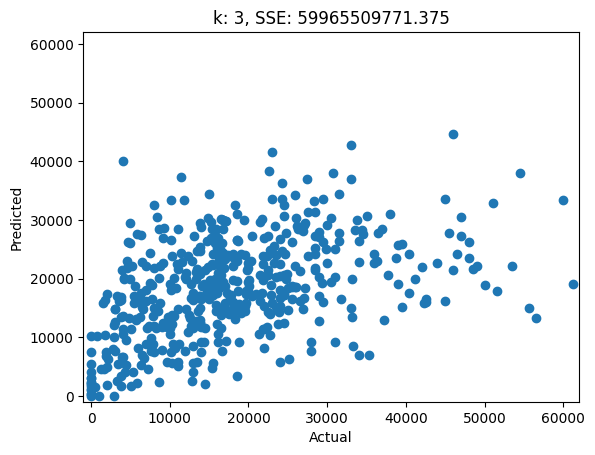

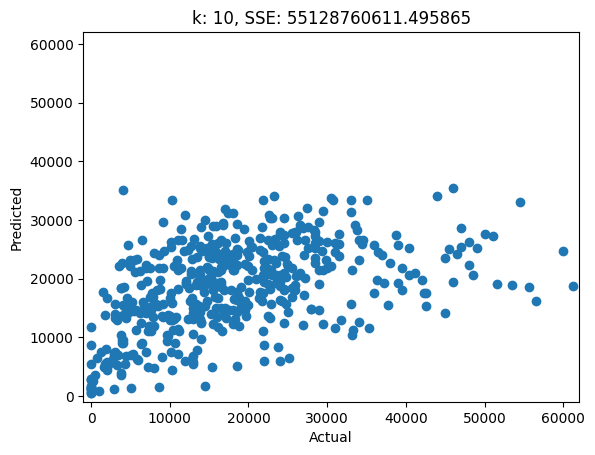

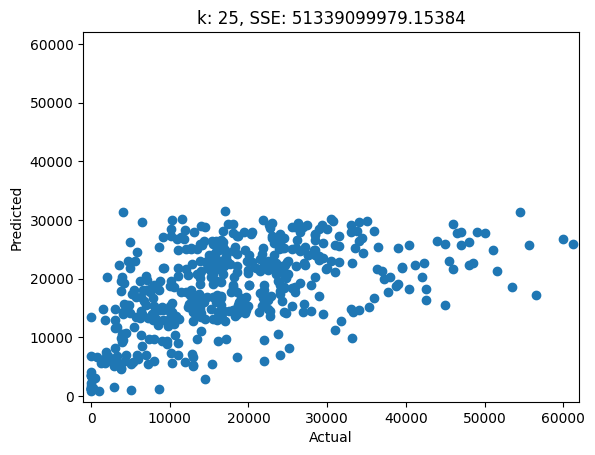

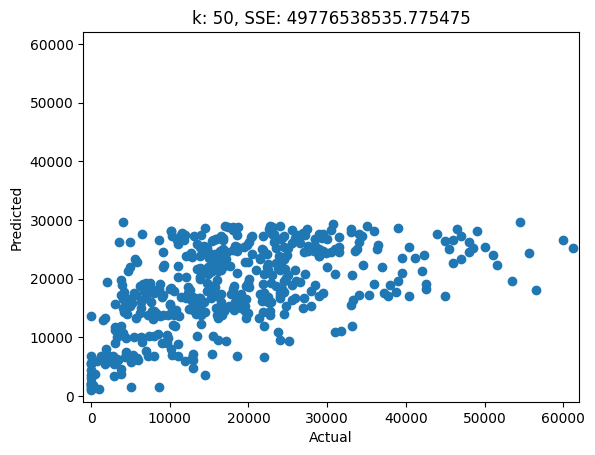

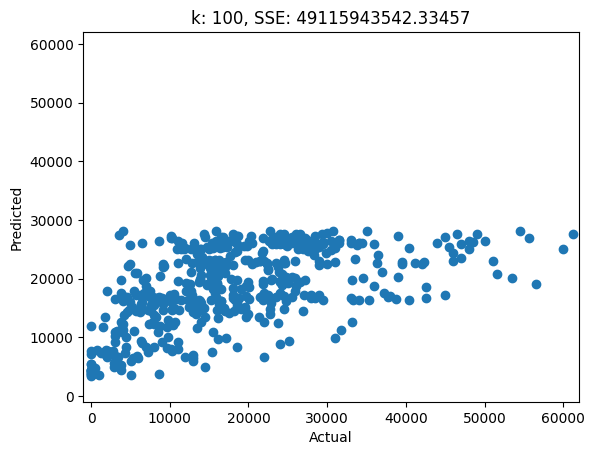

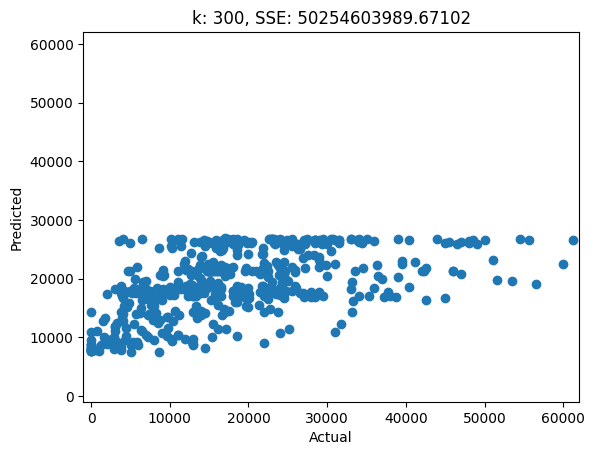

In [13]:
# 1.4
from sklearn.neighbors import KNeighborsRegressor
import matplotlib.pyplot as plt

for k in [3, 10, 25, 50, 100, 300]:
  model = KNeighborsRegressor(n_neighbors = k + 1) # Create a sk model for k
  fitted_model = model.fit(X_train, y_train) # Train the model on our data
  y_hat = fitted_model.predict(X_test) # Predict values for test set
  SSE = np.sum( (y_test-y_hat)**2 ) # Save the computed SSE for test set

  plot, axes = plt.subplots()
  plt.scatter(y_test, y_hat)
  plt.title('k: '+str(k)+', SSE: '+str(SSE))
  plt.xlabel("Actual")
  plt.ylabel("Predicted")
  axes.set_ylim(-1000, 62000)
  axes.set_xlim(-1000, 62000)
  plt.show()

As k increases, the preducted values become less spread out, and the graph flattens. For k = 3, values are predicted between around 0 and 45000, but for k = 300, values are predicted between 7000 and 28000. Generally, the SSE decreases and then levels off as k increases.

[77]


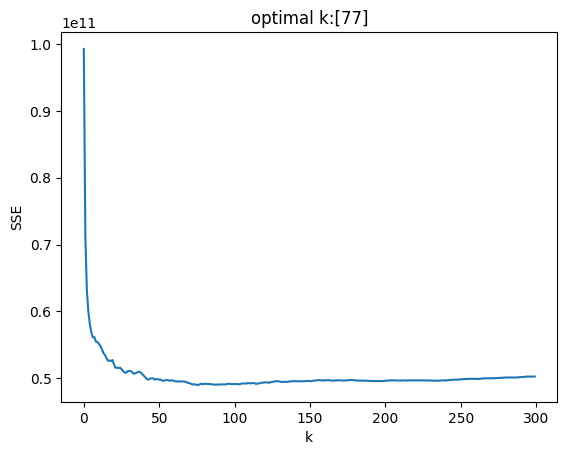

In [14]:
# 1.5
k_bar = 300
k_grid = np.arange(1, k_bar)
SSE = np.zeros(k_bar)

for k in range(k_bar):
  fitted_model = KNeighborsRegressor(n_neighbors = k + 1).fit(X_train, y_train)
  y_hat = fitted_model.predict(X_test)
  SSE[k] = np.sum( (y_test - y_hat)**2 )

SSE_min = np.min(SSE)
min_index = np.where(SSE == SSE_min)
k_star = k_grid[min_index]
print(k_star)

plt.plot(np.arange(0, k_bar), SSE)
plt.xlabel("k")
plt.title("optimal k:" + str(k_star))
plt.ylabel('SSE')
plt.show()

The optimal k is 77 because this is where the SSE is the lowest between the actual and predicted values in the test data.

## 1.6
In the plots of plots of predicted versus actual prices, the model was underfitting for k = 3, k = 10, and k = 25, and the model was overfitting for k = 300. This is reflected by the underfit plots having very high variability since there is a lack of meaningful features found in the data. Furthermore, the overfit plot has very uniform predictions in overly constrained groups. As k increases, the range of predicted values deecreases. The best plots are those for k = 50 and k = 100 since these are closest to the optimal k = 77.

**Q5.** This question is a case study for $k$ nearest neighbor regression, using the `heart_failure_clinical_records_dataset.csv` data.

The data for the question include:

- age: age of the patient (years)
- anaemia: decrease of red blood cells or hemoglobin (boolean)
- high blood pressure: if the patient has hypertension (boolean)
- creatinine phosphokinase (CPK): level of the CPK enzyme in the blood (mcg/L)
- diabetes: if the patient has diabetes (boolean)
- ejection fraction: percentage of blood leaving the heart at each contraction (percentage)
- platelets: platelets in the blood (kiloplatelets/mL)
- sex: woman or man (binary)
- serum creatinine: level of serum creatinine in the blood (mg/dL)
- serum sodium: level of serum sodium in the blood (mEq/L)
- smoking: if the patient smokes or not (boolean)
- time: follow-up period (days)
- death event: if the patient deceased during the follow-up period (boolean)

1. Load the `./data/heart_failure_clinical_records_dataset.csv`. Are there any `NA`'s to handle? use `.drop()` to remove `time` from the dataframe.
2. Make a correlation matrix. What variables are strongly associated with a death event?
3. For the dummy variables `anaemia`, `diabetes`, `high_blood_pressure`, `sex`, and `smoking`, compute a summary table of `DEATH_EVENT` grouped by the variable. For which variables does a higher proportion of the population die when the variable takes the value 1 rather than 0?
4. On the basis of your answers from 2 and 3, build a matrix $X$ of the variables you think are most predictive of a death, and a variable $y$ equal to `DEATH_EVENT`.
5. Maxmin normalize all of the variables in `X`.
6. Split the sample into ~80% for training and ~20% for evaluation. (Try to use the same train/test split for the whole question, so that you're comparing apples to apples in the questions below.).
7. Determine the optimal number of neighbors for a $k$NN regression for the variables you selected.
8. OK, do steps 5 through 7 again, but use all of the variables (except `time`). Which model has a lower Sum of Squared Error? Which would you prefer to use in practice, if you had to predict `DEATH_EVENT`s? If you play with the selection of variables, how much does the SSE change for your fitted model on the test data? Are more variables always better? Explain your findings.

In [15]:
import pandas as pd
import numpy as np

In [16]:
# 5.1
df = pd.read_csv('knn/data/heart_failure_clinical_records_dataset.csv')
total_nans = df.isna().sum()
print("Total NaNs:", total_nans)

Total NaNs: age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64


There are no NA values to handle.

In [17]:
df = df.drop('time', axis = 1)

In [18]:
# 5.2
print(df.corr())

                               age   anaemia  creatinine_phosphokinase  \
age                       1.000000  0.088006                 -0.081584   
anaemia                   0.088006  1.000000                 -0.190741   
creatinine_phosphokinase -0.081584 -0.190741                  1.000000   
diabetes                 -0.101012 -0.012729                 -0.009639   
ejection_fraction         0.060098  0.031557                 -0.044080   
high_blood_pressure       0.093289  0.038182                 -0.070590   
platelets                -0.052354 -0.043786                  0.024463   
serum_creatinine          0.159187  0.052174                 -0.016408   
serum_sodium             -0.045966  0.041882                  0.059550   
sex                       0.065430 -0.094769                  0.079791   
smoking                   0.018668 -0.107290                  0.002421   
DEATH_EVENT               0.253729  0.066270                  0.062728   

                          diabetes  e

Variables that are strongly associated with a death event are age which has a 0.25 correlation, ejection fraction which has a -0.27 correlation, and serum creatinine which has a 0.29 correlation.

In [19]:
# 5.3

for var in ['anaemia', 'diabetes', 'high_blood_pressure', 'sex', 'smoking']:
  print(df.loc[:,[var,'DEATH_EVENT']].groupby(var).describe())

        DEATH_EVENT                                             
              count      mean       std  min  25%  50%  75%  max
anaemia                                                         
0             170.0  0.294118  0.456991  0.0  0.0  0.0  1.0  1.0
1             129.0  0.356589  0.480859  0.0  0.0  0.0  1.0  1.0
         DEATH_EVENT                                             
               count      mean       std  min  25%  50%  75%  max
diabetes                                                         
0              174.0  0.321839  0.468530  0.0  0.0  0.0  1.0  1.0
1              125.0  0.320000  0.468353  0.0  0.0  0.0  1.0  1.0
                    DEATH_EVENT                                             
                          count      mean       std  min  25%  50%  75%  max
high_blood_pressure                                                         
0                         194.0  0.293814  0.456687  0.0  0.0  0.0  1.0  1.0
1                         105.0  0.37

A higher proportion of the population dies when the variable takes the value 1 rather than 0 for variables high_blood_pressure (0.077 difference) and anaemia (0.063 difference). diabetes, sex, and smoking do not seem very predictive since DEATH_EVENT has a very close mean for values 0 and 1.

In [20]:
# 5.4

X = df.loc[:, ['age', 'ejection_fraction', 'serum_creatinine', 'high_blood_pressure', 'anaemia']]
y = df['DEATH_EVENT']

In [21]:
# 5.5

def maxmin(var):
  norm = (var - min(var))/(max(var) - min(var))
  return norm

X = X.apply(maxmin)

In [22]:
# 5.6

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=100)


In [ ]:
# 5.7

